### Given Datasets:
#### 1. Sample - Superstore_Orders.csv - Superstore orders between Jan 2017 to Dec 2020.
#### 2. Sales Target (US)_Full Data.csv - Sales Target Data by Product Category, Segment between Jan 2017 to Dec 2020.

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import math
from IPython.display import Image

pd.set_option('max_columns', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
os.listdir()

# check for input datasets and visualization files from Tableau.

['.ipynb_checkpoints',
 'Executive_Overview.PNG',
 'final_data.csv',
 'Product_Category_Stats.PNG',
 'Regional_Discount.PNG',
 'Regional_Profit.PNG',
 'Regional_Profit_Ratio.PNG',
 'Regional_Sales.PNG',
 'Sales Commission_Full Data.csv',
 'Sales Target (US)_Full Data.csv',
 'Sales_Target_Stats.PNG',
 'sales_univariate_quarter.PNG',
 'Sample - Superstore_Orders.csv',
 'shipment_status.PNG',
 'Ship_Mode_Stats.PNG',
 'Superstore Orders - EDA & Forecast Model Insights.ipynb',
 'yearly_sales.PNG']

In [3]:
orders = pd.read_csv('Sample - Superstore_Orders.csv')

In [4]:
orders.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,Region,Row ID,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
0,Furniture,Henderson,United States,CG-12520,Claire Gute,11/8/2019,CA-2019-152156,42420.0,FUR-BO-10001798,Bush Somerset Collection Bookcase,South,1,Consumer,11/11/2019,Second Class,Shipped On Time,Kentucky,Bookcases,3,3,0.00%,$42,2,$262,$392
1,Furniture,Henderson,United States,CG-12520,Claire Gute,11/8/2019,CA-2019-152156,42420.0,FUR-CH-10000454,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",South,2,Consumer,11/11/2019,Second Class,Shipped On Time,Kentucky,Chairs,3,3,0.00%,$220,3,$732,"$1,096"
2,Office Supplies,Los Angeles,United States,DV-13045,Darrin Van Huff,6/12/2019,CA-2019-138688,90036.0,OFF-LA-10000240,Self-Adhesive Address Labels for Typewriters by Universal,West,3,Corporate,6/16/2019,Second Class,Shipped Late,California,Labels,4,3,0.00%,$7,2,$15,$22
3,Furniture,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,10/11/2018,US-2018-108966,33311.0,FUR-TA-10000577,Bretford CR4500 Series Slim Rectangular Table,South,4,Consumer,10/18/2018,Standard Class,Shipped Late,Florida,Tables,7,6,45.00%,($383),5,$958,"$1,434"
4,Office Supplies,Fort Lauderdale,United States,SO-20335,Sean O'Donnell,10/11/2018,US-2018-108966,33311.0,OFF-ST-10000760,Eldon Fold 'N Roll Cart System,South,5,Consumer,10/18/2018,Standard Class,Shipped Late,Florida,Storage,7,6,20.00%,$3,2,$22,$33


In [5]:
orders.info() 
orders.shape 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
Category                  9994 non-null object
City                      9994 non-null object
Country/Region            9994 non-null object
Customer ID               9994 non-null object
Customer Name             9994 non-null object
Order Date                9994 non-null object
Order ID                  9994 non-null object
Postal Code               9983 non-null float64
Product ID                9994 non-null object
Product Name              9994 non-null object
Region                    9994 non-null object
Row ID                    9994 non-null int64
Segment                   9994 non-null object
Ship Date                 9994 non-null object
Ship Mode                 9994 non-null object
Ship Status               9994 non-null object
State                     9994 non-null object
Sub-Category              9994 non-null object
Days to Ship Actual       9994 non-null int64
D

(9994, 25)

#### Checking for duplicates.

In [6]:
orders.duplicated().sum()

0

In [7]:
# observing the dataset Order ID and Product ID are the primary keys

orders[['Order ID','Product ID']].drop_duplicates().shape

(9986, 2)

In [8]:
orders[['Order ID','Product ID']].duplicated().sum()

8

In [9]:
orders.loc[orders[['Order ID','Product ID']].duplicated()]

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,Region,Row ID,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
352,Office Supplies,New York City,United States,AB-10060,Adam Bellavance,9/1/2019,CA-2019-129714,10009.0,OFF-PA-10001970,Xerox 1881,East,353,Home Office,9/3/2019,First Class,Shipped Late,New York,Paper,2,1,0.00%,$23,4,$49,$74
431,Technology,Gastonia,United States,RB-19795,Ross Baird,4/15/2019,US-2019-123750,28052.0,TEC-AC-10004659,Imation Secure+ Hardware Encrypted USB 2.0 Flash Drive; 16GB,South,432,Home Office,4/21/2019,Standard Class,Shipped On Time,North Carolina,Accessories,6,6,20.00%,$55,5,$292,$437
1301,Furniture,Springfield,United States,LC-17140,Logan Currie,12/23/2019,CA-2019-137043,22153.0,FUR-FU-10003664,"Electrix Architect's Clamp-On Swing Arm Lamp, Black",South,1302,Consumer,12/25/2019,Second Class,Shipped Early,Virginia,Furnishings,2,3,0.00%,$83,3,$286,$429
3184,Office Supplies,Columbia,United States,BM-11650,Brian Moss,11/9/2020,CA-2020-152912,21044.0,OFF-ST-10003208,Adjustable Depth Letter/Legal Cart,East,3185,Corporate,11/12/2020,Second Class,Shipped On Time,Maryland,Storage,3,3,0.00%,$158,3,$544,$815
3406,Furniture,Columbus,United States,LB-16795,Laurel Beltran,4/23/2017,US-2017-150119,43229.0,FUR-CH-10002965,"Global Leather Highback Executive Chair with Pneumatic Height Adjustment, Black",East,3407,Home Office,4/27/2017,Standard Class,Shipped Early,Ohio,Chairs,4,6,30.00%,($12),2,$281,$421
6500,Office Supplies,Louisville,United States,SS-20515,Shirley Schmidt,7/24/2018,CA-2018-103135,40214.0,OFF-BI-10000069,"GBC Prepunched Paper, 19-Hole, for Binding Systems, 24-lb",South,6501,Home Office,7/28/2018,Standard Class,Shipped Early,Kentucky,Binders,4,6,0.00%,$41,6,$90,$135
7882,Technology,Thornton,United States,LC-16870,Lena Cacioppo,12/3/2020,CA-2020-118017,80229.0,TEC-AC-10002006,Memorex Micro Travel Drive 16 GB,West,7883,Consumer,12/6/2020,Second Class,Shipped On Time,Colorado,Accessories,3,3,20.00%,$14,8,$102,$153
9169,Office Supplies,Jackson,United States,SJ-20125,Sanjit Jacobs,3/15/2019,CA-2019-140571,39212.0,OFF-PA-10001954,Xerox 1964,South,9170,Home Office,3/19/2019,Standard Class,Shipped Early,Mississippi,Paper,4,6,0.00%,$21,2,$46,$68


In [10]:
orders.loc[(orders['Order ID'] == 'CA-2019-129714') & (orders['Product ID'] == 'OFF-PA-10001970')]

# This is due to error in data collection or reporting - we could delete, manipulate or proceed as it is.


,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,Region,Row ID,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
350,Office Supplies,New York City,United States,AB-10060,Adam Bellavance,9/1/2019,CA-2019-129714,10009.0,OFF-PA-10001970,Xerox 1881,East,351,Home Office,9/3/2019,First Class,Shipped Late,New York,Paper,2,1,0.00%,$12,2,$25,$37
352,Office Supplies,New York City,United States,AB-10060,Adam Bellavance,9/1/2019,CA-2019-129714,10009.0,OFF-PA-10001970,Xerox 1881,East,353,Home Office,9/3/2019,First Class,Shipped Late,New York,Paper,2,1,0.00%,$23,4,$49,$74


### Data screening & cleaning steps for orders data:

#### 1. Postal Code is having missing values and should be converted to string.
#### 2. Remove special characters from Sales, Discount, Profit, Sales Forecast columns and convert data type to float64.
#### 3. Ship Date & Order Date to be converted to datetime and rearrange the dataset by Order Date.
#### 4. Keep the latest entry in the duplicates, remove other duplicates (Assumption : Correction is allowed after customer has ordered).
#### 5. Rearrange columns in a meaningful order and drop Row ID column.

In [11]:
orders.loc[(orders['Postal Code'].isnull()),'Postal Code'] = '05401'
orders['Postal Code'] = orders['Postal Code'].astype(str)

In [12]:
orders['Sales'] = orders['Sales'].apply(lambda x: x.replace('$','').replace(',','')).astype('float64')
orders['Sales Forecast'] = orders['Sales Forecast'].apply(lambda x: x.replace('$','').replace(',','')).astype('float64')
orders['Discount'] = orders['Discount'].apply(lambda x: x.strip('%')).astype('float64')
orders['Profit'] = orders['Profit'].apply(lambda x: x.replace('(','-').replace(')', '').replace('$','').replace(',','')).astype('float64')

In [13]:
orders['Order Date'] = pd.to_datetime(orders['Order Date'])
orders['Ship Date'] = pd.to_datetime(orders['Ship Date'])
orders = orders.sort_values(by = 'Order Date')

In [14]:
orders.head()

,Category,City,Country/Region,Customer ID,Customer Name,Order Date,Order ID,Postal Code,Product ID,Product Name,Region,Row ID,Segment,Ship Date,Ship Mode,Ship Status,State,Sub-Category,Days to Ship Actual,Days to Ship Scheduled,Discount,Profit,Quantity,Sales,Sales Forecast
7980,Office Supplies,Houston,United States,DP-13000,Darren Powers,2017-01-03,CA-2017-103800,77095.0,OFF-PA-10000174,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",Central,7981,Consumer,2017-01-07,Standard Class,Shipped Early,Texas,Paper,4,6,20.0,6.0,2,16.0,25.0
739,Office Supplies,Naperville,United States,PO-19195,Phillina Ober,2017-01-04,CA-2017-112326,60540.0,OFF-LA-10003223,Avery 508,Central,740,Home Office,2017-01-08,Standard Class,Shipped Early,Illinois,Labels,4,6,20.0,4.0,3,12.0,18.0
740,Office Supplies,Naperville,United States,PO-19195,Phillina Ober,2017-01-04,CA-2017-112326,60540.0,OFF-ST-10002743,SAFCO Boltless Steel Shelving,Central,741,Home Office,2017-01-08,Standard Class,Shipped Early,Illinois,Storage,4,6,20.0,-65.0,3,273.0,408.0
741,Office Supplies,Naperville,United States,PO-19195,Phillina Ober,2017-01-04,CA-2017-112326,60540.0,OFF-BI-10004094,GBC Standard Plastic Binding Systems Combs,Central,742,Home Office,2017-01-08,Standard Class,Shipped Early,Illinois,Binders,4,6,80.0,-5.0,2,4.0,5.0
1759,Office Supplies,Philadelphia,United States,MB-18085,Mick Brown,2017-01-05,CA-2017-141817,19143.0,OFF-AR-10003478,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",East,1760,Consumer,2017-01-12,Standard Class,Shipped Late,Pennsylvania,Art,7,6,20.0,5.0,3,20.0,29.0


In [15]:
orders.drop_duplicates(subset = ['Order ID','Product ID'], keep = 'last', inplace = True)
# asssumption made - keep last duplicated rows as correction is allowed after the customer has ordered. 
# pandas series version doesn't take 'ignore_index' parameter in 'drop_duplicates', and so we have to reset index
orders = orders.reset_index(drop=True)

In [16]:
orders.shape

(9986, 25)

In [17]:
rearranged_col = ['Order ID','Order Date','Ship Date','Ship Mode','Days to Ship Actual','Days to Ship Scheduled','Ship Status','Customer ID','Customer Name','Segment','Country/Region','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Sales','Quantity','Discount','Profit','Sales Forecast']
# column 'Row ID' is dropped.
orders_data = orders.reindex(columns = rearranged_col)

In [18]:
orders_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Ship Status,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Forecast
0,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,4,6,Shipped Early,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",16.0,2,20.0,6.0,25.0
1,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,12.0,3,20.0,4.0,18.0
2,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,273.0,3,20.0,-65.0,408.0
3,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,4.0,2,80.0,-5.0,5.0
4,CA-2017-141817,2017-01-05,2017-01-12,Standard Class,7,6,Shipped Late,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",20.0,3,20.0,5.0,29.0


#### Importing Sales Target Data

In [19]:
sales_target = pd.read_csv('Sales Target (US)_Full Data.csv')

In [20]:
sales_target.head()

,Category,Order Date,Segment,Sales Target
0,Office Supplies,1/3/2017,Consumer,15
1,Office Supplies,1/4/2017,Home Office,300
2,Office Supplies,1/5/2017,Consumer,21
3,Furniture,1/6/2017,Home Office,2316
4,Office Supplies,1/6/2017,Consumer,17


In [21]:
sales_target.info()
sales_target.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4603 entries, 0 to 4602
Data columns (total 4 columns):
Category        4603 non-null object
Order Date      4603 non-null object
Segment         4603 non-null object
Sales Target    4603 non-null int64
dtypes: int64(1), object(3)
memory usage: 143.9+ KB


(4603, 4)

#### Checking for duplicates

In [22]:
sales_target.duplicated().sum()

0

In [23]:
# observing the dataset Category, Order Date and Segment are the primary keys

sales_target[['Category','Order Date','Segment']].drop_duplicates().shape

(4600, 3)

In [24]:
sales_target[['Category','Order Date','Segment']].duplicated().sum()

3

In [25]:
sales_target.loc[sales_target[['Category','Order Date','Segment']].duplicated()]

,Category,Order Date,Segment,Sales Target
1051,Furniture,3/1/2018,Corporate,1191
1053,Office Supplies,3/1/2018,Consumer,64
1056,Technology,3/1/2018,Corporate,91


In [26]:
sales_target.loc[(sales_target['Category'] == 'Furniture') & (sales_target['Order Date'] == '3/1/2018') & (sales_target['Segment'] == 'Corporate')]

,Category,Order Date,Segment,Sales Target
1050,Furniture,3/1/2018,Corporate,174
1051,Furniture,3/1/2018,Corporate,1191


### Data screening & cleaning steps for sales target data:

#### 1. Order Date to be converted to datetime and rearrange dataset by Order Date.
#### 2. Keep the latest entry in the duplicates, remove other duplicates (Assumption : Correction is allowed in Sales Target Data).

In [27]:
sales_target['Order Date'] = pd.to_datetime(sales_target['Order Date'])

In [28]:
sales_target.drop_duplicates(subset = ['Category','Order Date','Segment'], keep = 'last', inplace = True)
# asssumption made - keep last duplicated rows as correction is allowed in Sales Target Data. 
# pandas series version doesn't take 'ignore_index' parameter in 'drop_duplicates', and so we have to reset index
sales_target = sales_target.reset_index(drop=True)

In [29]:
sales_target.head()

,Category,Order Date,Segment,Sales Target
0,Office Supplies,2017-01-03,Consumer,15
1,Office Supplies,2017-01-04,Home Office,300
2,Office Supplies,2017-01-05,Consumer,21
3,Furniture,2017-01-06,Home Office,2316
4,Office Supplies,2017-01-06,Consumer,17


In [30]:
sales_target.shape

(4600, 4)

In [31]:
orders_data.shape

(9986, 24)

### Preparing the final data.

In [32]:
final_data = pd.merge(orders_data,sales_target,how='left',on=['Category','Order Date','Segment'])

In [33]:
final_data.head()

,Order ID,Order Date,Ship Date,Ship Mode,Days to Ship Actual,Days to Ship Scheduled,Ship Status,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Sales Forecast,Sales Target
0,CA-2017-103800,2017-01-03,2017-01-07,Standard Class,4,6,Shipped Early,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Forms/Pg., 200 Dupl. Sets/Book",16.0,2,20.0,6.0,25.0,15
1,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,12.0,3,20.0,4.0,18.0,300
2,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,273.0,3,20.0,-65.0,408.0,300
3,CA-2017-112326,2017-01-04,2017-01-08,Standard Class,4,6,Shipped Early,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,4.0,2,80.0,-5.0,5.0,300
4,CA-2017-141817,2017-01-05,2017-01-12,Standard Class,7,6,Shipped Late,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,"Avery Hi-Liter EverBold Pen Style Fluorescent Highlighters, 4/Pack",20.0,3,20.0,5.0,29.0,21


In [34]:
final_data.info()
final_data.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9986 entries, 0 to 9985
Data columns (total 25 columns):
Order ID                  9986 non-null object
Order Date                9986 non-null datetime64[ns]
Ship Date                 9986 non-null datetime64[ns]
Ship Mode                 9986 non-null object
Days to Ship Actual       9986 non-null int64
Days to Ship Scheduled    9986 non-null int64
Ship Status               9986 non-null object
Customer ID               9986 non-null object
Customer Name             9986 non-null object
Segment                   9986 non-null object
Country/Region            9986 non-null object
City                      9986 non-null object
State                     9986 non-null object
Postal Code               9986 non-null object
Region                    9986 non-null object
Product ID                9986 non-null object
Category                  9986 non-null object
Sub-Category              9986 non-null object
Product Name              9986 no

(9986, 25)

### Additional information we could pull out from the dataset:

#### 1. Price of Product
#### 2. Profit Ratio
#### 3. Sales Target status
#### 4. Forecast bias
#### 5. Sales Forecast status

In [35]:
final_data['Price'] = round(final_data['Sales']/final_data['Quantity'],2)

In [36]:
final_data['Profit Ratio'] = round(final_data['Profit']*100/final_data['Sales'],2)
final_data.loc[(final_data['Sales'] == 0),'Profit Ratio'] = 0

In [37]:
final_data.loc[((final_data['Sales Target'] - final_data['Sales'])<=0),'Sales Target Status'] = 'Target Achieved'
final_data.loc[((final_data['Sales Target'] - final_data['Sales'])>0),'Sales Target Status'] = 'Target Not Achieved'

In [38]:
final_data['forecast_bias'] = final_data['Sales Forecast'] - final_data['Sales']

In [39]:
final_data.loc[(final_data['forecast_bias']>0),'Sales Forecast Status'] = 'Over Forecast'
final_data.loc[(final_data['forecast_bias']== 0),'Sales Forecast Status'] = 'Accurate Forecast'
final_data.loc[(final_data['forecast_bias']<0),'Sales Forecast Status'] = 'Under Forecast'

In [40]:
#final_data.to_csv('final_data.csv',index=False)

#### Descriptive statistics of the dataset:

In [41]:
final_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Days to Ship Actual,9986.0,3.959343,1.749211,0.0,3.0,4.000,5.000,8.0
Days to Ship Scheduled,9986.0,4.320749,2.176297,0.0,3.0,6.000,6.000,6.0
Sales,9986.0,229.723413,623.323811,0.0,17.0,54.000,210.000,22638.0
Quantity,9986.0,3.787302,2.222033,1.0,2.0,3.000,5.000,14.0
Discount,9986.0,15.625776,20.649912,0.0,0.0,20.000,20.000,80.0
Profit,9986.0,28.583217,234.299253,-6600.0,2.0,9.000,29.000,8400.0
Sales Forecast,9986.0,344.020429,933.476517,1.0,26.0,81.000,314.000,33903.0
Sales Target,9986.0,651.900060,1103.852516,1.0,104.0,318.000,775.000,25729.0
Price,9986.0,60.920364,142.977085,0.0,5.5,16.250,64.000,3773.0
Profit Ratio,9986.0,12.005430,46.996688,-400.0,6.4,26.935,37.225,100.0


#### Insights for categorical variables:



In [42]:
cat_var = ['Ship Mode','Ship Status','Customer ID','Customer Name','Segment','Country/Region','City','State','Postal Code','Region','Product ID','Category','Sub-Category','Product Name','Sales Target Status','Sales Forecast Status']

uniq_cat = pd.DataFrame()
uniq_cat['variables'] = cat_var

for x in cat_var:
    uniq_cat.loc[(uniq_cat['variables'] == x),'no. of unique values'] = final_data[x].nunique()

uniq_cat['no. of unique values'] = uniq_cat['no. of unique values'].astype(int)
    
new_cols = uniq_cat.loc[(uniq_cat['no. of unique values'] < 10),'variables'].to_list()

uniq_cat.loc[(uniq_cat['no. of unique values'] > 10),'unique values'] = '-'

for x in new_cols:
    uniq_cat.loc[(uniq_cat['variables'] == x),'unique values'] = str(final_data[x].unique())

uniq_cat

,variables,no. of unique values,unique values
0,Ship Mode,4,['Standard Class' 'First Class' 'Second Class' 'Same Day']
1,Ship Status,3,['Shipped Early' 'Shipped Late' 'Shipped On Time']
2,Customer ID,793,-
3,Customer Name,793,-
4,Segment,3,['Consumer' 'Home Office' 'Corporate']
5,Country/Region,1,['United States']
6,City,531,-
7,State,49,-
8,Postal Code,631,-
9,Region,4,['Central' 'East' 'South' 'West']


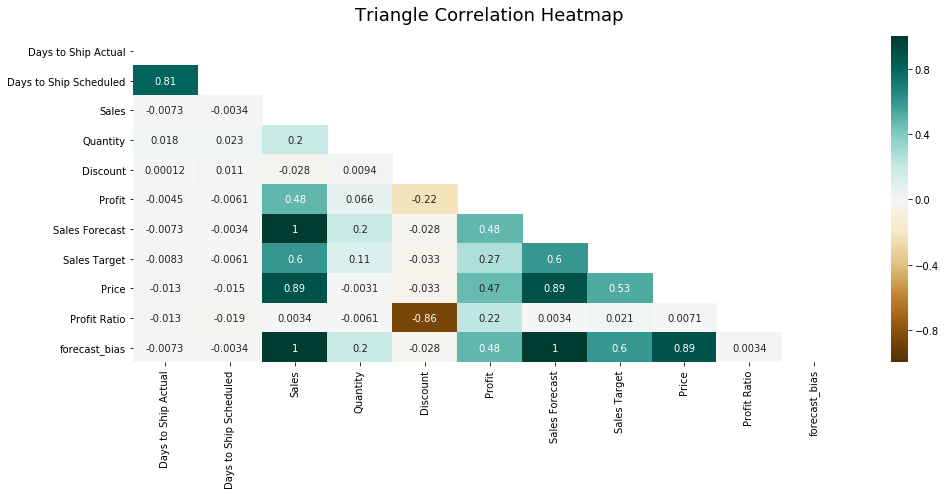

In [43]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(final_data.corr(), dtype=np.bool))
heatmap = sns.heatmap(final_data.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

#### Insights from correlation matrix:

 - Looking at the table, we see that Discount and Profit Ratio have the highest negative correlation, and we can deduce that high discounts mean less profit.
 - The correlation coefficient for Profit and Selling Price is high. As Selling Price increases, Profit also is higher.
 - Sales, Sales Forecast, Price, forecast_bias are obviously positively correlated and are inter related to each other.
 - Sales Target & Profit are positively correlated with Sales, implies we can obtain high profit with high sales amount and obviously our sales target would also increase.

### Insights:

<img src="sales_univariate_quarter.png" width="800" height="400">


- At quarterly aggregate level - the forecast model always over forecasts and the sales target is always greater than the actual sales.

- Sales are always high in Q4 of every year and it decreases significantly in Q1. One of the reason being Q4 as a holiday season and so are the sales high.


<img src="yearly_sales.png" width="800" height="400">

- In every year, sales are having a dip in October and the reason should be investigated.


<img src="Product_Category_Stats.png" width="800" height="400">


- Sales are highest for Chairs, Storage and Phones in their respective Product Categories.
- Profit is highest for Chairs, Paper and Copiers in their respective Product Categories.
- Tables & Supplies are having lowest profit and could be due to high shipping costs.

<img src="Regional_Sales.png" width="800" height="400">

- California has the highest sales and there is an opportunity to open another store. North Dakota has least number of sales.


<img src="Regional_Profit.png" width="800" height="400">

- California & New Jersey has the highest profit amount.Texas & Illinois has the least profit amount. There is an opportunity to open another store in New Jersey as well.


<img src="Regional_Profit_Ratio.png" width="800" height="400">

- District of Columbia & Iowa have the highest profit ratio's across all the states. Illinois & Texas has the lowest profit ratio's.


<img src="Regional_Discount.png" width="800" height="400">

- Highest Discounts are recorded in Illinois & Texas. This could be the reason for having least profits from these two states. If we could reduce discounts in these two states, we could increase the profits.


<img src="shipment_status.png" width="800" height="400">

- In all of the years, the orders which are shipped early has the highest number of sales and profit.


<img src="Sales_Target_Stats.png" width="800" height="400">

- Sales belonging to Office Supplies, Furniture, Technology, Office Supplies haven't achieved the target in 2017, 2018, 2019 & 2020 respectively.


<img src="Ship_Mode_Stats.png" width="800" height="400">

- In the case of Office Supplies and Tables, profit is really low when these items are shipped in standard class. We could achieve profit if we shift the demand for these two product categories from standard class to the remaining ship modes. Organization could remove the standard class ship mode option for these two product categories.


### Executive Dashboard

<img src="Executive_Overview.png" width="800" height="400">


- When considered the evaluation period between 2017 to 2020, organization should focus on improving the sales & profit from states of Illinois and Texas. Organization should also consider opening a new store in California to increase their profits.



### Forecast model KPI's and insights.

#### Additional information required for model accuracy calculation:

#### 1. dollarized weight
#### 2. MAPE
#### 3. WMAPE

#### Inorder to get forecast model accuracy at global level, initially we need to aggregate the data to sku * Order Date level

In [44]:
# calculating dollarized weight

dte = list(pd.date_range(final_data['Order Date'].min(),final_data['Order Date'].max(),freq='D'))

for x in range(0,len(dte)):
    final_data.loc[(final_data['Order Date'] == dte[x]), 'dollarized_wgt'] = round(final_data.loc[(final_data['Order Date'] == dte[x]), 'Sales']/final_data.loc[(final_data['Order Date'] == dte[x]), 'Sales'].sum(),2)

In [45]:
final_data['MAPE'] = 0
final_data.loc[(final_data['Sales']==0)&(final_data['Sales Forecast']>0), 'MAPE'] = 100
final_data.loc[final_data['Sales']>0, 'MAPE'] = abs(final_data.loc[final_data['Sales']>0, 'Sales'] - final_data.loc[final_data['Sales']>0, 'Sales Forecast']) / final_data.loc[final_data['Sales']>0, 'Sales'] * 100
final_data['MAPE'] = round(final_data['MAPE'],2)

In [46]:
final_data['WMAPE'] = final_data['dollarized_wgt'] * final_data['MAPE']

In [47]:
accuracy_data = final_data.groupby(['Product ID','Order Date'])['WMAPE'].sum().reset_index()

In [48]:
accuracy = 100 - accuracy_data['WMAPE'].mean()

In [49]:
accuracy

93.82944691109996

### Forecast model insights:

 - forecast model never underforecasts
 - forecast model has 93.83 % global forecast accuracy for the evaluation period between Jan 2017 to Dec 2020.